## Installations and Requirements

In [2]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install plotly

You should consider upgrading via the 'C:\Users\Mher.Movsisyan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Mher.Movsisyan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Mher.Movsisyan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Mher.Movsisyan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Imports and Settings

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot
import plotly.graph_objects as go
from plotly.express import imshow

In [2]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## Helper Functions

In [3]:
def plot_distribution(image):
    x = image[:, :, 0].flatten()
    y = image[:, :, 1].flatten()
    z = image[:, :, 2].flatten()
    c = image.reshape(-1, 3) / 255.0
    marker=dict(color=c, size=5)
    fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, marker=marker, mode='markers', opacity=0.3)])
    fig.show()

In [4]:
def plot_image(image):
    fig = go.Figure(go.Image(z=image))
    fig.show()

# Read Image

### Read image.jpg from the folder

In [5]:
image_raw = cv2.imread(r"C:\Users\Mher.Movsisyan\Downloads\image.jpg")

### Theoretical question: What is unusual about OpenCV's image reading function? (hint: plot the image)

In [6]:
# No need to plot, I'm aware that it reads it into BGR format instead of RGB

# Convert Image from BGR to RGB (using OpenCV)

In [7]:
image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)

### Plot RGB Image & Distribution

Did not use the provided helper functions because of a dependency issue within some packages

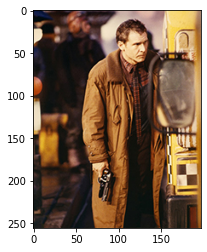

In [10]:
plot.imshow(image);

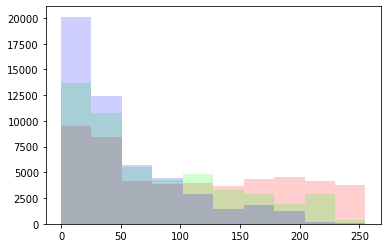

In [18]:
plot.hist(image[:,:,0].flatten(), color="#FF000030")
plot.hist(image[:,:,1].flatten(), color="#00FF0030")
plot.hist(image[:,:,2].flatten(), color="#0000FF30");

## Convert Image from RGB to YUY (from scratch without using OpenCV)

In [11]:
yuv_image = np.matmul(image, np.array([
    [0.299, 0.587, 0.114],
    [-0.14713, -0.28886, 0.436],
    [0.615, -0.51499, -0.10001]
]).T)

yuv_image = yuv_image.reshape(image.shape)

yuv_image[:, :, 0] = np.clip(yuv_image[:, :, 0], 0, 255)
yuv_image[:, :, 1:] = np.clip(yuv_image[:, :, 1:], -128, 127)
yuv_image = yuv_image.astype(np.uint8)

## Plot YUV Image & Distribution

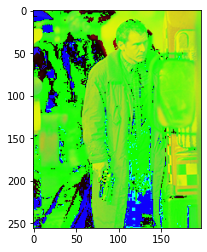

In [12]:
plot.imshow(yuv_image)

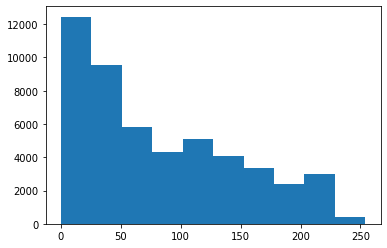

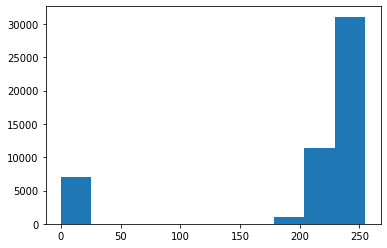

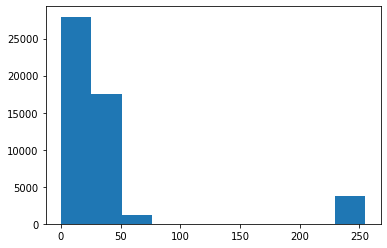

In [13]:
plot.hist(yuv_image[:,:,0].flatten())
plot.show()
plot.hist(yuv_image[:,:,1].flatten())
plot.show()
plot.hist(yuv_image[:,:,2].flatten())
plot.show()

## Convert Image from RGB to HSV (from scratch without using OpenCV)


In [15]:
def rgb_to_hsv(img):
    # Find max and min for each pixel color channel
    maxc = img.max(-1)
    minc = img.min(-1)

    out = np.zeros(img.shape)

    # Set the V (Value) channel in the output to the maximum values
    out[:,:,2] = maxc
    
    # Calculate the S (Saturation) channel in the output
    out[:,:,1] = (maxc - minc) / maxc

    # Calculate intermediate values for the H (Hue) channel
    divs = (maxc[...,None] - img) / ((maxc - minc)[...,None])
    cond1 = divs[...,2] - divs[...,0]
    cond2 = 2.0 + divs[...,0] - divs[...,1]
    h = 4.0 + divs[...,1] - divs[...,2]

    # Set the H channel values
    h[img[...,2] == maxc] = cond1[img[...,2] == maxc]
    h[img[...,0] == maxc] = cond2[img[...,0] == maxc]

    # Scale n shift H to [0, 1)
    out[:,:,0] = (h / 6.0) % 1.0

    out[minc == maxc, :2] = 0

    return out 

In [16]:
hsv_image = rgb_to_hsv(image)

C:\Users\Mher.Movsisyan\AppData\Local\Temp\ipykernel_6440\459084649.py:12: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Mher.Movsisyan\AppData\Local\Temp\ipykernel_6440\459084649.py:15: RuntimeWarning:

invalid value encountered in true_divide



## Plot HSV image & 3D distribution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


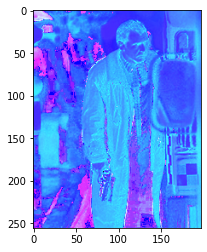

In [18]:
plot.imshow(hsv_image);

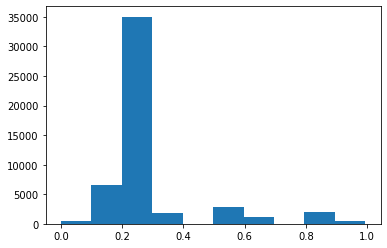

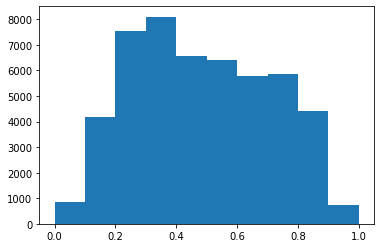

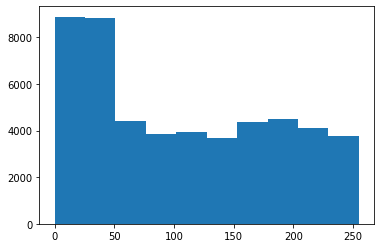

In [40]:
plot.hist(hsv_image[:,:,0].flatten())
plot.show()
plot.hist(hsv_image[:,:,1].flatten())
plot.show()
plot.hist(hsv_image[:,:,2].flatten())
plot.show()

## Shift Hue Values in HSV Color Space (from scratch without using OpenCV)

In [48]:
def hsv_to_rgb(hsv_image):
    """
    Convert an HSV image back to the RGB color space.
    """
    h = hsv_image[:,:,0]
    s = hsv_image[:,:,1]
    v = hsv_image[:,:,2]

    hi = (h * 6).astype(int)
    f = (h * 6) - hi
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)

    rgb_image = np.empty(hsv_image.shape, dtype=np.uint8)

    # Calculate the RGB channels based on the hue value
    for i in range(6):
        mask = hi == i
        rgb_image[..., 0][mask] = (v - v * s)[mask]
        rgb_image[..., 1][mask] = t[mask]
        rgb_image[..., 2][mask] = p[mask]

    return rgb_image

shifted_hsv_image = hsv_image.copy()
shifted_hsv_image[:,:,0] = (hsv_image[:,:,0] + (d_hue := 0.11)) % 1.0

## Convert Shifted Image from HSV to RGB (from scratch without using OpenCV)

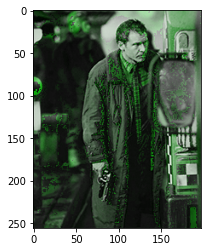

In [50]:
shifted_image = hsv_to_rgb(shifted_hsv_image)
plot.imshow(shifted_image)